# **Modelling**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix,make_scorer, make_scorer,accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve, classification_report
from jcopml.feature_importance import mean_score_decrease
from scipy.stats import uniform
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [8]:
df = pd.read_csv("C:/Users/Nafi Kareem/OneDrive/Dokumen/Data MIning/Text Mining/Sentiment Analysis Projects/translated_data.csv")
df

,review,polarity,sentiment
0,one of the popular campuses in malang the peop...,0.275000,Positive
1,i visited here to take my sister to study here...,0.537500,Positive
2,the clean campus is cool and nice for hanging ...,0.438889,Positive
3,sunday morning try going for a morning walk wi...,0.359722,Positive
4,the vocational faculty is still new and needs ...,0.145455,Positive
...,...,...,...
1013,beautiful and beautiful,0.850000,Positive
1014,beautiful campus,0.850000,Positive
1015,good,0.700000,Positive
1016,best campus,1.000000,Positive


**Tokenization and Stemming**

In [9]:
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)
df['review'] = df['review'].apply(word_tokenize_wrapper)
df

,review,polarity,sentiment
0,"[one, of, the, popular, campuses, in, malang, ...",0.275000,Positive
1,"[i, visited, here, to, take, my, sister, to, s...",0.537500,Positive
2,"[the, clean, campus, is, cool, and, nice, for,...",0.438889,Positive
3,"[sunday, morning, try, going, for, a, morning,...",0.359722,Positive
4,"[the, vocational, faculty, is, still, new, and...",0.145455,Positive
...,...,...,...
1013,"[beautiful, and, beautiful]",0.850000,Positive
1014,"[beautiful, campus]",0.850000,Positive
1015,[good],0.700000,Positive
1016,"[best, campus]",1.000000,Positive


In [10]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['review'] = df['review'].apply(lambda x: [stemmer.stem(token) for token in x])
df

,review,polarity,sentiment
0,"[one, of, the, popular, campus, in, malang, th...",0.275000,Positive
1,"[i, visit, here, to, take, my, sister, to, stu...",0.537500,Positive
2,"[the, clean, campu, is, cool, and, nice, for, ...",0.438889,Positive
3,"[sunday, morn, tri, go, for, a, morn, walk, wi...",0.359722,Positive
4,"[the, vocat, faculti, is, still, new, and, nee...",0.145455,Positive
...,...,...,...
1013,"[beauti, and, beauti]",0.850000,Positive
1014,"[beauti, campu]",0.850000,Positive
1015,[good],0.700000,Positive
1016,"[best, campu]",1.000000,Positive


**Labeling**

In [11]:
df.loc[df['sentiment']=="Positive",'label_sen']= 1
df.loc[df['sentiment']=="Negative",'label_sen']= 0
label_num = pd.DataFrame(df['label_sen'])
label_num

,label_sen
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1013,1.0
1014,1.0
1015,1.0
1016,1.0


**Feature Extraction**

In [12]:

df_review = pd.DataFrame(index=df.index)

for index, row in df.iterrows():
    df_review.loc[index, 'review'] = ' '.join(row['review']) 

counter = CountVectorizer()
X = counter.fit_transform(df_review['review'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names_out())

vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names_out())

df_tfidf

,1995,abbrevi,abil,abl,about,abroad,absolut,abund,academ,academi,...,yellow,yesterday,yet,yo,you,young,younger,your,yuem,zainoel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114003,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.210327,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


**Splitting train test set**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df['label_sen'], test_size=0.30, random_state=30)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 1347)
y_train shape: (712,)
X_test shape: (306, 1347)
y_test shape: (306,)


In [8]:
y_train = y_train.apply(lambda x: int(x))
y_test = y_test.apply(lambda x: int(x))

In [9]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=2)

## **K-Fold Cross Validation**

In [10]:
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5)
scores

array([0.94405594, 0.95104895, 0.95070423, 0.95070423, 0.93661972])

In [11]:
print("Mean cross-validation score: {:.4f} ± {:.4f}".format(scores.mean(), scores.std()))

Mean cross-validation score: 0.9466 ± 0.0056


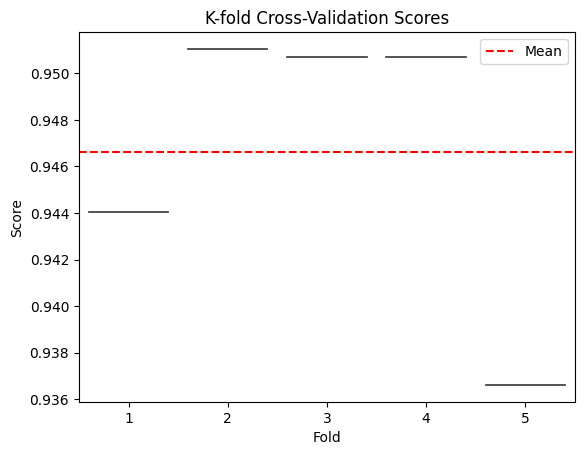

In [12]:
mean_score = np.mean(scores)

sns.violinplot(x=range(1, 6), y=scores)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('K-fold Cross-Validation Scores')
plt.axhline(mean_score, linestyle='--', color='r', label='Mean')
plt.legend()
plt.show()

## **Hyperparameter Tuning**

**Set Parameters Range**

In [13]:
gbparameter = {
    'max_depth': [8, 7, 6, 5, 4],
    'n_estimators': [400, 300, 200, 100],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 1, 1.5, 2],
    'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.025],
}

score = {
    'accuracy':make_scorer(accuracy_score),
    'precision':make_scorer(precision_score),
    'recall':make_scorer(recall_score),
    'f1':make_scorer(f1_score, average='macro', labels=[0, 1]),
    'roc':make_scorer(roc_auc_score)
}

- max_depth:  mengontrol kedalaman maksimum dari pohon keputusan individual dalam model XGBoost. Setiap pohon keputusan dibuat berdasarkan pembelahan data training menjadi cabang-cabang berdasarkan fitur-fitur yang paling relevan.

- n_estimators: menentukan jumlah pohon keputusan yang akan dibangun dalam model XGBoost. XGBoost menggunakan teknik ensemble learning, yaitu menggabungkan prediksi dari beberapa pohon keputusan individual untuk mendapatkan hasil yang lebih akurat.

- Gamma: nilai minimal loss reduction yang dibutuhkan pada saat pemecahan cabang. Semakin besar nilai gamma yang ditetapkan, model yang dibangun akan lebih konservatif dan memungkinkan terjadinya underfitting.

- Learning_rate: tingkat penyesuaian bobot fitur. Dalam pembangunan model, setiap iterasi menghasilkan bobot untuk fitur-fitur yang dimiliki. Learning_rate berguna untuk membantu menyusutkan nilai bobot tersebut agar model yang dibangun tidak mengalami overfitting.

**GridSearchCV**

In [14]:
GB_Grid = GridSearchCV(
    xgb_clf,
    gbparameter,
    scoring=score,
    refit='f1',  
    cv=5, 
    verbose=0,
    n_jobs=-1
)

start_time = time.time()
GB_result_GS = GB_Grid.fit(X_train, y_train)

print("Best: %f using %s" % (GB_result_GS.best_score_, GB_result_GS.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.589713 using {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 400}
Execution time: 1499.8341765403748 s


**RandomizedSearchCV**

In [15]:
GB_random = RandomizedSearchCV(
    xgb_clf,
    gbparameter,
    scoring=score,
    refit='f1',
    cv=5,
    verbose=0,
    n_iter=100,
    random_state=30,
    n_jobs=-1,
)

start_time = time.time()
GB_result_RS = GB_random.fit(X_train, y_train)

print("Best: %f using %s" % (GB_result_RS.best_score_, GB_result_RS.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.589713 using {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.2}
Execution time: 211.81448197364807 s


## **Evaluation**

In [16]:
y_pred_grid = GB_result_GS.best_estimator_.predict(X_test)

In [17]:
y_pred_random = GB_result_RS.best_estimator_.predict(X_test)

**Accuracy, Recall, Precicion, F1-Score**

In [39]:
grid_accuracy = metrics.accuracy_score(y_test, y_pred_grid)
grid_recall = metrics.recall_score(y_test, y_pred_grid)
grid_precision = metrics.precision_score(y_test, y_pred_grid)
grid_f1 = metrics.f1_score(y_test, y_pred_grid)

grid_accuracy_percent = '{:.2%}'.format(grid_accuracy)
grid_recall_percent = '{:.2%}'.format(grid_recall)
grid_precision_percent = '{:.2%}'.format(grid_precision)
grid_f1_percent = '{:.2%}'.format(grid_f1)

print('Grid Accuracy:',grid_accuracy_percent)
print('Grid Recall:',grid_recall_percent)
print('Grid Precicion:',grid_precision_percent)
print('Grid F1_Score:',grid_f1_percent)
 

Grid Accuracy: 94.44%
Grid Recall: 99.65%
Grid Precicion: 94.72%
Grid F1_Score: 97.12%


In [38]:
random_accuracy = metrics.accuracy_score(y_test, y_pred_random)
random_recall = metrics.recall_score(y_test, y_pred_random)
random_precision = metrics.precision_score(y_test, y_pred_random)
random_f1 = metrics.f1_score(y_test, y_pred_random)

random_accuracy_percent = '{:.2%}'.format(random_accuracy)
random_recall_percent = '{:.2%}'.format(random_recall)
random_precision_percent = '{:.2%}'.format(random_precision)
random_f1_percent = '{:.2%}'.format(random_f1)

print('Random Accuracy:',random_accuracy_percent)
print('Random Recall:',random_recall_percent)
print('Random Precicion:',random_precision_percent)
print('Random F1_Score:',random_f1_percent)
 

Random Accuracy: 94.77%
Random Recall: 99.65%
Random Precicion: 95.03%
Random F1_Score: 97.29%


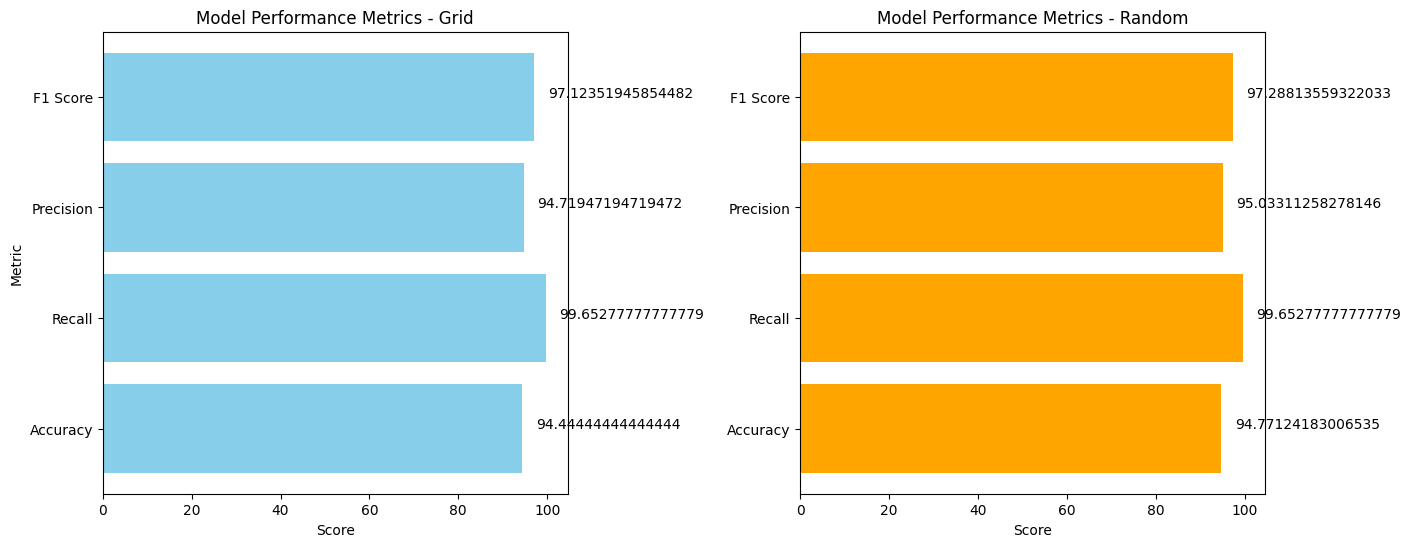

In [104]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
scores_grid = [grid_accuracy*100, grid_recall*100, grid_precision*100, grid_f1*100]
scores_random = [random_accuracy*100, random_recall*100, random_precision*100, random_f1*100]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

y_pos = np.arange(len(metrics))
plt.subplot(1,2,1)
plt.barh(y_pos, scores_grid, align='center', color='skyblue')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Model Performance Metrics - Grid')
plt.yticks(y_pos, metrics)
for i, v in enumerate(scores_grid):
    plt.text(v + 3, i, str(v), va='baseline')
    
plt.subplot(1,2,2)
plt.barh(y_pos, scores_random, align='center', color='orange')
plt.xlabel('Score')
plt.title('Model Performance Metrics - Random')
plt.yticks(y_pos, metrics)
for i, v in enumerate(scores_random):
    plt.text(v + 3, i, str(v), va='baseline')
    
plt.subplots_adjust(wspace=0.5, hspace=2)
plt.show()
plt.show()

**Confusion Matrix**

In [20]:
print(confusion_matrix(y_test, y_pred_grid))

[[  2  16]
 [  1 287]]


In [21]:
print(confusion_matrix(y_test, y_pred_random))

[[  3  15]
 [  1 287]]


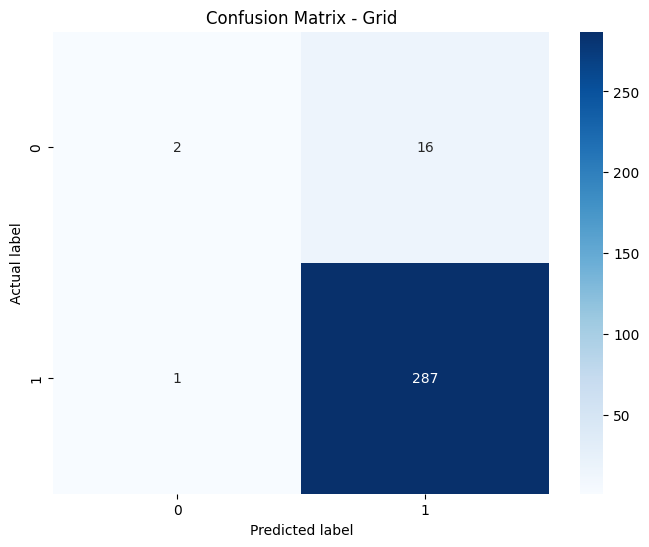

In [107]:
conf_mat = confusion_matrix(y_test, y_pred_grid)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - Grid')
plt.show()

dari 18 sampel uji yang termasuk dalam kelas 0, model dengan benar mengidentifikasi 2 sampel sebagai negatif dan salah mengklasifikasikan 16 sampel sebagai positif. Dari 288 sampel uji yang termasuk dalam kelas 1, model tersebut dengan benar mengidentifikasi 287 sebagai positif dan salah mengklasifikasikan 1 sebagai negatif. confusion matrix ini menunjukkan bahwa model tersebut berkinerja baik dalam mengidentifikasi sentimen positif (kelas 1) tetapi kesulitan dalam mengidentifikasi sentimen negatif (kelas 0). Ketidakseimbangan performa antara kedua kelas ini dapat disebabkan oleh berbagai faktor, seperti ketidakseimbangan data training, dll.

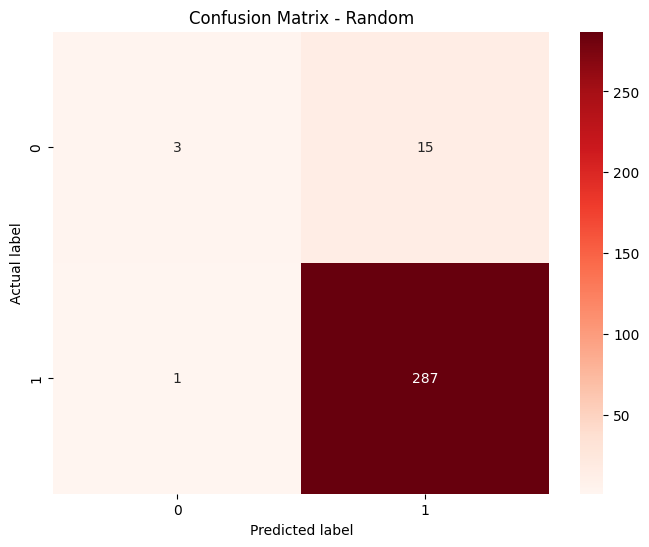

In [108]:
conf_mat = confusion_matrix(y_test, y_pred_random)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - Random')
plt.show()

dari 18 sampel uji yang termasuk dalam kelas 0, model dengan benar mengidentifikasi 3 sampel sebagai negatif dan salah mengklasifikasikan 15 sampel sebagai positif. Dari 288 sampel uji yang termasuk dalam kelas 1, model tersebut dengan benar mengidentifikasi 287 sebagai positif dan salah mengklasifikasikan 1 sebagai negatif. confusion matrix ini menunjukkan bahwa model tersebut berkinerja baik dalam mengidentifikasi sentimen positif (kelas 1) tetapi kesulitan dalam mengidentifikasi sentimen negatif (kelas 0). Ketidakseimbangan performa antara kedua kelas ini dapat disebabkan oleh berbagai faktor, seperti ketidakseimbangan data training, dll.

**ROC AUC Curve**

In [32]:
y_prob_GRID = GB_result_GS.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_grid = roc_auc_score(y_test, y_prob_GRID)
print('Grid ROC Score:', roc_auc_grid)

Grid ROC Score: 0.8630401234567902


In [33]:
y_prob_random = GB_result_RS.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_random = roc_auc_score(y_test, y_prob_random)
print('Random ROC Score:', roc_auc_random)

Random ROC Score: 0.8592785493827161


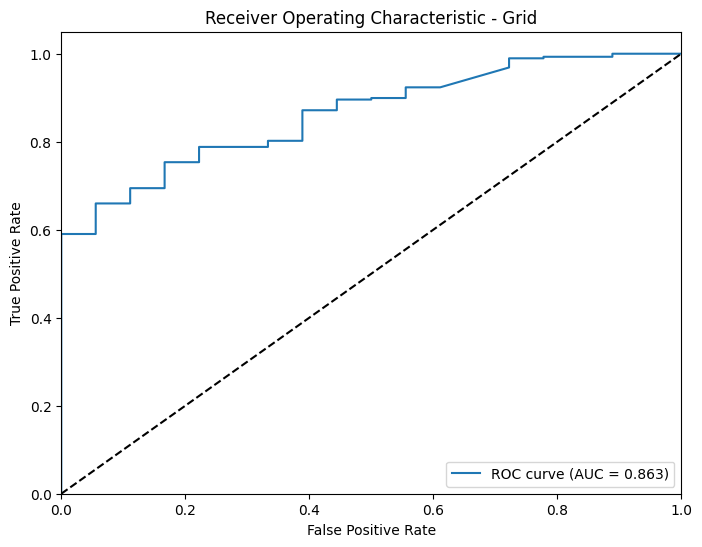

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_GRID)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % roc_auc_grid)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Grid')
plt.legend(loc="lower right")
plt.show()

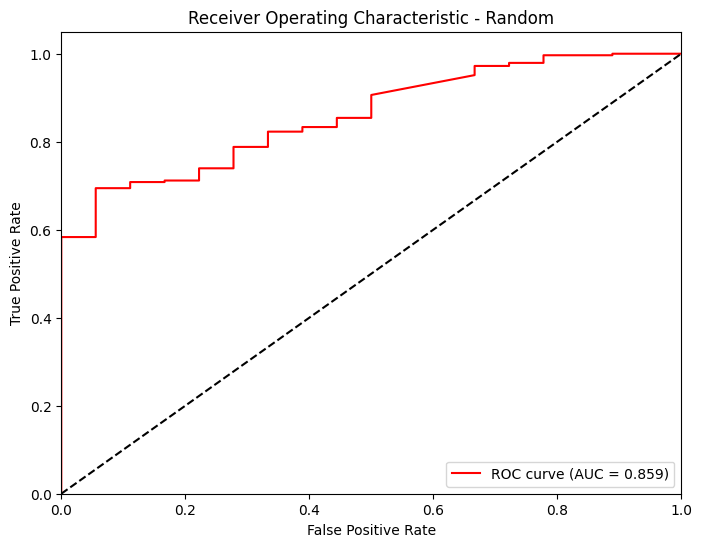

In [106]:
fpr_random, tpr_random, threshold_random = roc_curve(y_test, y_prob_random)

plt.figure(figsize=(8, 6))
plt.plot(fpr_random, tpr_random, label='ROC curve (AUC = %0.3f)' % roc_auc_random, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random')
plt.legend(loc="lower right")
plt.show()

## **Conclusion**

1. mean cross-validation score sebesar 0,9466 menunjukkan bahwa, rata-rata, model mencapai akurasi 94,66% ketika memprediksi label set pengujian yang diadakan. standar deviasi sebesar 0,0056 (sekitar 0,56%) menunjukkan bahwa performa model relatif konsisten di berbagai bagian prosedur validasi silang.

2. Berdasarkan output, metode penyetelan hyperparameter Grid Search dan Random Search untuk menghasilkan skor terbaik yang sama sebesar 0,589713 menggunakan hyperparameter yang berbeda. Metode grid search menggunakan total waktu eksekusi sebesar 1499.83 detik, sedangkan metode random search hanya membutuhkan waktu 211.81 detik dengan selisih waktu 1238,02 detik.hyperparameter yang ditemukan oleh kedua metode tersebut sedikit berbeda. Untuk Grid Search, hyperparameter terbaik adalah 'gamma': 0,1, 'learning_rate': 0,3, 'max_ depth': 6, dan 'n_estimators': 400. Sebaliknya, hyperparameter terbaik yang ditemukan melalui Random Search adalah 'n_estimators':400, 'kedalaman_maks': 4, 'laju_belajar': 0,2, dan 'gamma': 0,2. Secara umum, hyperparameter yang ditemukan oleh kedua metode serupa dalam hal 'n_estimators' dan 'learning_rate', yang menunjukkan bahwa parameter ini mungkin berdampak signifikan terhadap performa model. Kedua metode tuning hyperparameter yang digunakan dalam kasus ini menghasilkan skor terbaik yang serupa, namun metode pRandom Search lebih efisien dalam hal waktu eksekusi.

3.  - Accuracy: Random Search mencapai akurasi yang sedikit lebih tinggi (94,77%) dibandingkan dengan Grid Search (94,44%).
    - Recall: Kedua metode mencapai recall yang sama (99,65%).
    - Precicion: Random Search memiliki presisi yang sedikit lebih tinggi (95,03%) dibandingkan Grid Search (94,72%).
    - F1-Score : Random Search memiliki F1-Score yang sedikit lebih baik (97,29%) dibandingkan dengan Grid Search (97,12%).

    Meskipun Random Search menunjukkan sedikit peningkatan pada beberapa metrik, perbedaan antara kedua metode tersebut sangat kecil. Dalam kasus khusus ini, Grid Search dan Random Search menghasilkan kinerja yang sebanding untuk analisis sentimen menggunakan XGBoost.

4. Penyetelan hyperparameter Grid Search dan Random Search menghasilkan model XGBoost dengan performa yang kuat dalam analisis sentimen. Model tersebut mencapai akurasi tinggi dalam mengidentifikasi sentimen negatif dan positif, dengan jumlah kesalahan klasifikasi yang sangat kecil. Dari kedua metode tersebut, hanya terdapat sedikit perbedaan dalam mengklasifikasikan kelas negatif. Hal ini menunjukkan bahwa pilihan hyperparameter yang ditemukan oleh GridSearchCV dan RandomizedSearchCV tidak berdampak signifikan terhadap kemampuan model dalam mengklasifikasikan data pengujian dengan benar.

5. Skor AUC-ROC merupakan ukuran kemampuan model dalam membedakan kelas positif dan negatif. Skor 1 menunjukkan model sempurna, sedangkan skor 0,5 menunjukkan model yang kinerjanya tidak lebih baik dari tebakan acak.  skor AUC-ROC_grid sebesar 0.8630 menunjukkan bahwa model tersebut memiliki kinerja yang cukup baik dalam membedakan antara sentimen positif dan negatif. begitu pula dalam AUC-ROC_random sebesar 0.8592 menunjukkan bahwa model tersebut memiliki kinerja yang cukup baik dalam membedakan antara sentimen positif dan negatif.